In [ ]:
import pandas
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/andywaltlova/python-1-podzim-2022/master/ukoly/data/platy_2021_02.csv"
platy = pandas.read_csv(url, index_col='cislo_zamestnance')

In [ ]:
platy.head()

,plat
cislo_zamestnance,
3,54900.0
6,54800.0
7,36400.0
8,47900.0
16,34200.0


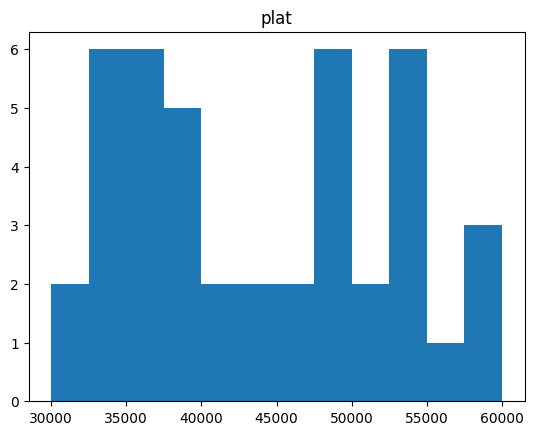

In [ ]:
# Načti si tato data do tabulky a vytvoř histogram. Nastav vhodně hranice skupin histogramu (parametr bins), aby byl graf přehledný a snadno interpretovatelný.
platy.hist(bins=[
    30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500, 50000, 52500, 55000, 57500, 60000
],
grid=False
)

plt.show()

Dobrovolný doplněk

In [87]:
# Vyzkoušej si vytvořit podgrafy. pandas a matplotlib to umí poměrně jednoduše a to pomocí parametru by metody hist(). Jako parametr vlož sloupec, podle kterého chceš data do podgrafů rozdělit. Musíš vložit sloupec ve formě dat, nikoli pouze jeho název.

praha = pandas.read_csv("zam_praha.csv")
plzen = pandas.read_csv("zam_plzeň.csv")
liberec = pandas.read_csv("zam_liberec.csv")
platy = pandas.read_csv("platy_2021_02.csv")

praha['mesto'] = 'Praha'
plzen['mesto'] = 'Plzeň'
liberec['mesto'] = 'Liberec'

zamestnanci = pandas.concat([praha, plzen, liberec], ignore_index=True)

zamestnanci_join = pandas.merge(zamestnanci, platy, on=['cislo_zamestnance'], how='left')
aktualni_zamestnanci = zamestnanci_join.dropna(axis=0)
df_praha = aktualni_zamestnanci.loc[aktualni_zamestnanci['mesto'] == 'Praha'][['plat']]
df_plzen = aktualni_zamestnanci.loc[aktualni_zamestnanci['mesto'] == 'Plzeň'][['plat']]
df_liberec = aktualni_zamestnanci.loc[aktualni_zamestnanci['mesto'] == 'Liberec'][['plat']]



(20000.0, 60000.0)

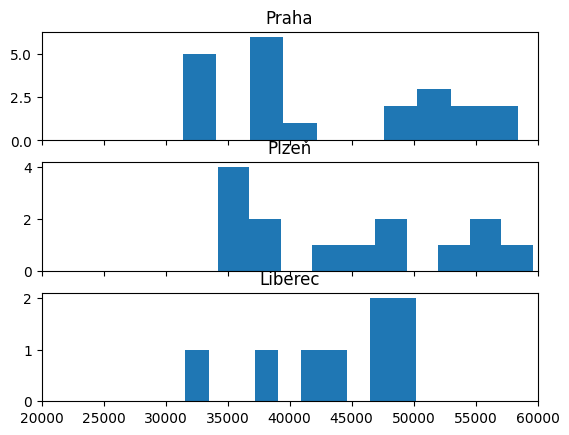

In [91]:
#Vytvoř pro zadaná data podgrafy pro jednotlivá města. Načti si informace o městě, ve kterém jednotliví pracovníci pracují (to jsme již dělali v minulém úkolu). Následně sloupec mesto použij na rozdělení podgrafů.
fig, ax = plt.subplots(3, 1, sharex='col', sharey='row')

axis_range = [20000,60000]

ax[0].hist(df_praha)
ax[0].set_title('Praha')
ax[0].set_xlim(axis_range)
ax[1].hist(df_plzen)
ax[1].set_title('Plzeň')
ax[1].set_xlim(axis_range)
ax[2].hist(df_liberec)
ax[2].set_title('Liberec')
ax[2].set_xlim(axis_range)


Teplota ve městech

Vrať se k práci se souborem temperature.csv, který obsahuje informace o průměrné teplotě v různých městech v listopadu 2017.

In [ ]:
import requests

r = requests.get("https://raw.githubusercontent.com/andywaltlova/python-1-podzim-2022/master/ukoly/data/temperature.csv")
open("temperature.csv", "wb").write(r.content)

316099

In [92]:
# Vytvoř tabulku, která bude obsahovat údaje o teplotě za města Helsinki, Miami Beach a Tokyo.
import pandas
import numpy as np
temp = pandas.read_csv("temperature.csv")

print(temp)

             Region  Country      City  Day  AvgTemperature
0            Africa  Algeria   Algiers    1            62.0
1            Africa  Algeria   Algiers    2            62.2
2            Africa  Algeria   Algiers    3            65.7
3            Africa  Algeria   Algiers    4            69.8
4            Africa  Algeria   Algiers    5            63.8
...             ...      ...       ...  ...             ...
8785  North America       US  Cheyenne   26            51.7
8786  North America       US  Cheyenne   27            55.5
8787  North America       US  Cheyenne   28            38.5
8788  North America       US  Cheyenne   29            36.8
8789  North America       US  Cheyenne   30            36.9

[8790 rows x 5 columns]


In [39]:
city_helsinki = temp[(temp["City"] == "Helsinki")]
teploty_helsinky = city_helsinki[['AvgTemperature']]

teploty_helsinky

,AvgTemperature
2160,29.6
2161,29.5
2162,35.1
2163,44.5
2164,45.5
2165,43.8
2166,36.0
2167,38.6
2168,42.4
2169,43.0


In [93]:
city_miami_beach = temp[(temp["City"] == "Miami Beach")]
teploty_miami_beach = city_miami_beach[['AvgTemperature']]

teploty_miami_beach

,AvgTemperature
5010,74.6
5011,76.8
5012,77.4
5013,77.4
5014,77.2
5015,78.6
5016,78.8
5017,79.0
5018,80.0
5019,80.2


In [94]:
city_tokyo = temp[(temp["City"] == "Tokyo")]
teploty_tokyo = city_tokyo[['AvgTemperature']]

teploty_tokyo

,AvgTemperature
1140,59.1
1141,62.3
1142,64.1
1143,59.6
1144,57.0
1145,60.4
1146,64.0
1147,62.5
1148,59.0
1149,62.1


(20.0, 90.0)

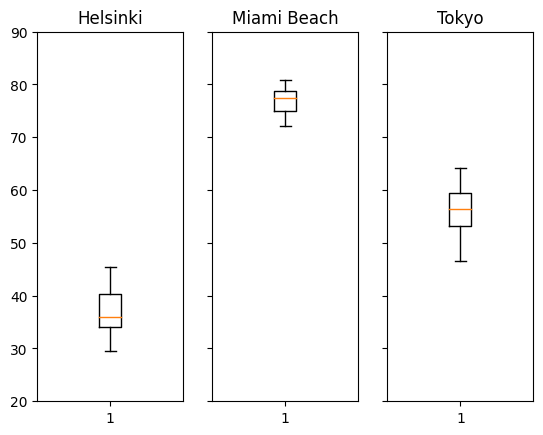

In [97]:
# Vytvoř krabicový graf a porovnej rozsah teplot v těchto městech.
temperatures_helsinki = teploty_helsinky.to_numpy()

temperatures_miami_beach = teploty_miami_beach.to_numpy()

temperatures_tokyo = teploty_tokyo.to_numpy()

y1 = np.random.randn(10)
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')

axis_range = [20,90]

ax[0].boxplot(temperatures_helsinki)
ax[0].set_title('Helsinki')
ax[0].set_ylim(axis_range)
ax[1].boxplot(temperatures_miami_beach)
ax[1].set_title('Miami Beach')
ax[1].set_ylim(axis_range)
ax[2].boxplot(temperatures_tokyo)
ax[2].set_title('Tokyo')
ax[2].set_ylim(axis_range)
